<a href="https://drive.google.com/drive/u/0/my-drive" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Laboratorio N° 01: 
## Crear un reporte asociado a los datos de negocio

Basado en el conjunto de datos "credit data.csv"

Crear un reporte con la siguiente descripción:

- Periodo de analisis: de 2014 a 2015
- Unidad de Tiempo: Trimestral (y total anual)
- Grupos de analisis: Por ingreso mensual con grupos. 
    * menos de 2.500
    * 2.500 a 5.000
    * 5.000 a 10.000
    * mas de 10.000
- KPIs:
    - Número de Créditos
    - delincuencia promedio (porcentaje de clientes en morosidad de 90dpd)
    - ingreso mensual promedio
- Estructura de tabla:
    * cuartos en columnas
    * Grupos y KPIs en filas.
- Dibuja una gráfica con:
    - Barras apiladas para el número de créditos
    - Líneas para la morosidad media

Adicional, Analisis de Data Exploratorio:

- Crear un par gráfico de parejas para todas las variables
- Crear un gráfico con Ingresos VS Edad en el medio, más distribuciones marginales    

**Importar Librerias**

---


In [0]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Importar Data

---


In [9]:
from google.colab import files
uploaded = files.upload()

Saving credit data.csv to credit data (1).csv


In [10]:
# import the data
df = pd.read_csv('credit data.csv', sep=';')
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,17/09/2015
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,02/07/2016
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,13/04/2016
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,26/08/2016
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0,18/11/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0,15/10/2014
149996,149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0,18/09/2014
149997,149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0,15/02/2015
149998,149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0,24/10/2014


In [11]:
# check types
df.dtypes

Id                                        int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
cohort_date                              object
dtype: object

In [12]:
# check the dates are well loaded
df.count()

Id                                      150000
SeriousDlqin2yrs                        150000
RevolvingUtilizationOfUnsecuredLines    150000
age                                     150000
NumberOfTime30-59DaysPastDueNotWorse    150000
DebtRatio                               150000
MonthlyIncome                           120269
NumberOfOpenCreditLinesAndLoans         150000
NumberOfTimes90DaysLate                 150000
NumberRealEstateLoansOrLines            150000
NumberOfTime60-89DaysPastDueNotWorse    150000
NumberOfDependents                      146076
cohort_date                             150000
dtype: int64

### 2. Entrada de valores perdidos

---


In [13]:
# check missings

df.isnull().sum().sum()

33655

In [14]:
# missing imputation
df['MonthlyIncome'].isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
149995    False
149996    False
149997     True
149998    False
149999    False
Name: MonthlyIncome, Length: 150000, dtype: bool

In [15]:
# check missings
df['MonthlyIncome'].isnull().sum()

29731

### 3. Seleccione la muestra de datos para el informe

---


In [16]:
# filter by date

df['cohort_date'] = pd.to_datetime(df['cohort_date'])
filtro_date = '17-09-2016'
mask = (df['cohort_date'] > filtro_date)
df = df.loc[mask]
df

,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...
149921,149922,0,0.031838,67,0,1182.000000,NaN,5,0,1,0,0.0,2016-12-04
149924,149925,1,0.673699,62,1,3653.000000,NaN,16,0,1,0,1.0,2016-12-06
149928,149929,0,0.342069,45,0,0.251994,8900.0,14,0,1,0,4.0,2016-11-07
149966,149967,0,0.081930,57,0,0.337166,16000.0,15,0,2,0,0.0,2016-11-04


In [17]:
# checking
df['cohort_date'].count()

3612

### 4. Crear variables intermedias


---


In [18]:
# create quarter variable
df['year'] = pd.DatetimeIndex(df['cohort_date']).year
df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Id,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,cohort_date,year
17,18,0,0.166284,53,0,0.188274,8800.0,7,0,0,0,0.0,2016-12-06,2016
38,39,0,0.363636,26,0,0.009990,1000.0,1,0,0,0,0.0,2016-10-06,2016
41,42,0,0.072898,81,0,75.000000,NaN,7,0,0,0,0.0,2016-10-01,2016
78,79,0,0.335559,69,0,0.270449,15000.0,14,0,2,0,1.0,2016-11-01,2016
97,98,0,0.010531,57,0,0.280665,5714.0,6,0,1,0,0.0,2016-11-04,2016


### 5. Crear Reportes

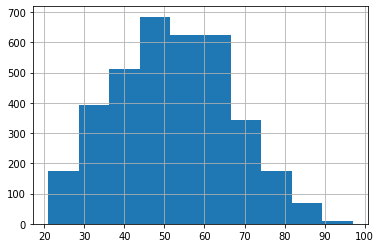

In [19]:
# report for age

df['age'].hist()

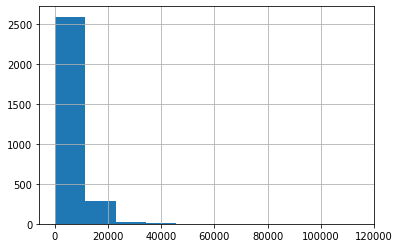

In [20]:
# report for MonthlyIncome

df['MonthlyIncome'].hist()

### 6. Graficos

In [0]:
# merge both reports
